In [1]:
import pandas as pd
import json
with open('test01.json') as f:
    data = json.load(f)

In [2]:
df1 = pd.DataFrame(data)
df1 = df1.rename(columns={0: "file"})
df1 = df1.assign(label=1)
for i in range(100,200):
    df1.label[i] = 0
df = df1.reindex()

C:\Users\adity\AppData\Local\Temp\ipykernel_15004\2560240892.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.label[i] = 0


In [3]:
#Label of 1 to be assigned as AI generated data
df_label_ai = df[df['label']==1]
#Label of 0 to be assigned as Human written data
df_label_human = df[df['label']==0]

In [4]:
# Cleaning data (removing NaNs)
df_human_clean = df_label_human.dropna(subset=['file'])
df_ai_clean = df_label_ai.dropna(subset=['file'])

# Convert to lowercase for consistency
df_human_clean['file'] = df_human_clean['file'].apply(lambda x: x.lower())
df_ai_clean['file'] = df_ai_clean['file'].apply(lambda x: x.lower())

<b> <h5> Violin Plot: </h5> </b> 
    <i> Used for comparison of text lengths of documents generated by AI and Human. </i>

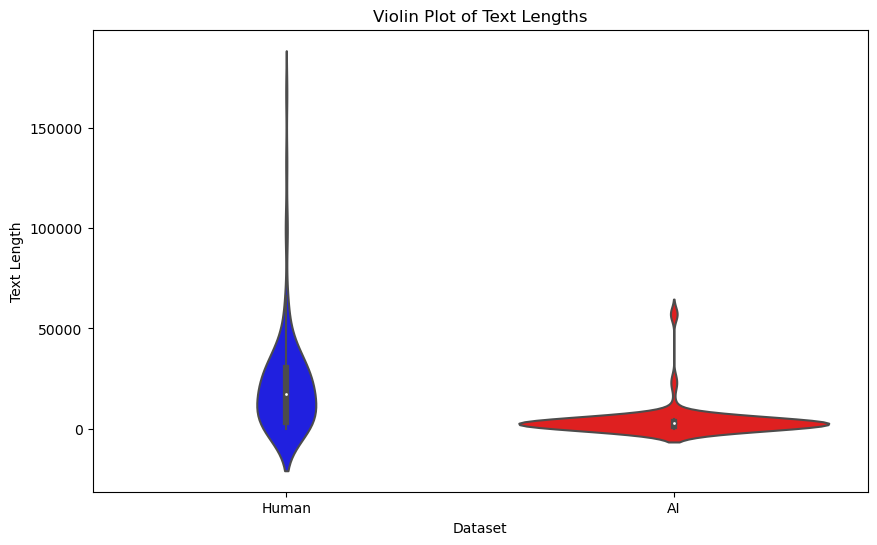

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  
df_human_clean['text_length'] = df_human_clean['file'].apply(len)

df_ai_clean['text_length'] = df_ai_clean['file'].apply(len)

combined_df = pd.concat([df_human_clean, df_ai_clean], keys=['Human', 'AI'])

plt.figure(figsize=(10, 6))
sns.violinplot(data=combined_df, x=combined_df.index.get_level_values(0), y='text_length', palette=['blue', 'red'])
plt.title('Violin Plot of Text Lengths')
plt.xlabel('Dataset')
plt.ylabel('Text Length')
plt.show()
